In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [2]:
og_df = pd.read_csv("split_fastas/all_prom_hit_table.tsv",sep='\t')

In [3]:
og_df

,query_name,subject_name,pident,aln_len,mismatches,gap_opens,query_start,query_end,subject_start,subject_end,evalue,score
0,EQU24_RS00005|dnaA|chromosomal,EQU24_RS00005|dnaA|chromosomal,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0
1,EQU24_RS00005|dnaA|chromosomal,EQU24_RS22155|rpmH|50S,100.000,168,0,0,133,300,300,133,3.270000e-86,311.0
2,EQU24_RS00010|dnaN|DNA,EQU24_RS00010|dnaN|DNA,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0
3,EQU24_RS00015|recF|DNA,EQU24_RS00015|recF|DNA,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0
4,EQU24_RS00015|recF|DNA,EQU24_RS04210||HAMP,86.335,161,19,3,8,165,104,264,1.610000e-44,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44130,EQU24_RS23170||transposase,EQU24_RS23170||transposase,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0
44131,EQU24_RS23170||transposase,EQU24_RS23175||type,100.000,105,0,0,196,300,300,196,3.430000e-51,195.0
44132,EQU24_RS23175||type,EQU24_RS23175||type,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0
44133,EQU24_RS23175||type,EQU24_RS21815||hypothetical,95.868,121,5,0,138,258,26,146,9.540000e-52,196.0


In [4]:
og_df.describe()

,pident,aln_len,mismatches,gap_opens,query_start,query_end,subject_start,subject_end,evalue,score
count,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,4.413500e+04,44135.000000
mean,93.358159,108.775348,6.015022,0.933182,70.518885,177.618874,116.720630,134.984140,4.339812e-10,159.462017
std,4.958872,64.064130,5.795477,1.529842,65.224249,74.751334,83.543114,90.957137,2.518356e-09,112.952546
min,75.403000,28.000000,0.000000,0.000000,1.000000,28.000000,1.000000,1.000000,1.370000e-159,52.800000
25%,89.796000,62.000000,1.000000,0.000000,5.000000,118.000000,48.000000,61.000000,2.670000e-47,89.800000
50%,93.548000,96.000000,4.000000,0.000000,60.000000,176.000000,111.000000,130.000000,9.820000e-32,130.000000
75%,97.561000,143.000000,9.000000,1.000000,115.000000,236.000000,178.000000,207.000000,1.670000e-19,182.000000
max,100.000000,301.000000,42.000000,20.000000,271.000000,300.000000,300.000000,300.000000,2.190000e-08,555.000000


In [5]:
# process id
og_df['q_locus_tag'] = og_df['query_name'].apply(lambda x: x.split('|')[0])
og_df['q_gene'] = og_df['query_name'].apply(lambda x: x.split('|')[1])
og_df['q_product'] = og_df['query_name'].apply(lambda x: x.split('|')[2])

og_df['s_locus_tag'] = og_df['subject_name'].apply(lambda x: x.split('|')[0])
og_df['s_gene'] = og_df['subject_name'].apply(lambda x: x.split('|')[1])
og_df['s_product'] = og_df['subject_name'].apply(lambda x: x.split('|')[2])

og_df

,query_name,subject_name,pident,aln_len,mismatches,gap_opens,query_start,query_end,subject_start,subject_end,evalue,score,q_locus_tag,q_gene,q_product,s_locus_tag,s_gene,s_product
0,EQU24_RS00005|dnaA|chromosomal,EQU24_RS00005|dnaA|chromosomal,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS00005,dnaA,chromosomal,EQU24_RS00005,dnaA,chromosomal
1,EQU24_RS00005|dnaA|chromosomal,EQU24_RS22155|rpmH|50S,100.000,168,0,0,133,300,300,133,3.270000e-86,311.0,EQU24_RS00005,dnaA,chromosomal,EQU24_RS22155,rpmH,50S
2,EQU24_RS00010|dnaN|DNA,EQU24_RS00010|dnaN|DNA,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS00010,dnaN,DNA,EQU24_RS00010,dnaN,DNA
3,EQU24_RS00015|recF|DNA,EQU24_RS00015|recF|DNA,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS00015,recF,DNA,EQU24_RS00015,recF,DNA
4,EQU24_RS00015|recF|DNA,EQU24_RS04210||HAMP,86.335,161,19,3,8,165,104,264,1.610000e-44,172.0,EQU24_RS00015,recF,DNA,EQU24_RS04210,,HAMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44130,EQU24_RS23170||transposase,EQU24_RS23170||transposase,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS23170,,transposase,EQU24_RS23170,,transposase
44131,EQU24_RS23170||transposase,EQU24_RS23175||type,100.000,105,0,0,196,300,300,196,3.430000e-51,195.0,EQU24_RS23170,,transposase,EQU24_RS23175,,type
44132,EQU24_RS23175||type,EQU24_RS23175||type,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS23175,,type,EQU24_RS23175,,type
44133,EQU24_RS23175||type,EQU24_RS21815||hypothetical,95.868,121,5,0,138,258,26,146,9.540000e-52,196.0,EQU24_RS23175,,type,EQU24_RS21815,,hypothetical


# Remove self-matches

In [43]:
self_match_df = og_df[og_df['q_locus_tag']==og_df['s_locus_tag']]
print(self_match_df.shape)
self_match_df[self_match_df['aln_len']<300]
# Some self matches are small reverse complements of palindromic repeats

(2239, 18)


,query_name,subject_name,pident,aln_len,mismatches,gap_opens,query_start,query_end,subject_start,subject_end,evalue,score,q_locus_tag,q_gene,q_product,s_locus_tag,s_gene,s_product
1398,EQU24_RS01215||IS66,EQU24_RS01215||IS66,100.000,32,0,0,41,72,72,41,1.310000e-10,60.2,EQU24_RS01215,,IS66,EQU24_RS01215,,IS66
2615,EQU24_RS01885||DUF4351,EQU24_RS01885||DUF4351,94.667,75,4,0,186,260,1,75,7.640000e-28,117.0,EQU24_RS01885,,DUF4351,EQU24_RS01885,,DUF4351
2616,EQU24_RS01885||DUF4351,EQU24_RS01885||DUF4351,94.667,75,4,0,1,75,186,260,7.640000e-28,117.0,EQU24_RS01885,,DUF4351,EQU24_RS01885,,DUF4351
8653,EQU24_RS05060||chemotaxis,EQU24_RS05060||chemotaxis,100.000,46,0,0,126,171,77,122,2.160000e-18,86.1,EQU24_RS05060,,chemotaxis,EQU24_RS05060,,chemotaxis
8654,EQU24_RS05060||chemotaxis,EQU24_RS05060||chemotaxis,100.000,46,0,0,77,122,126,171,2.160000e-18,86.1,EQU24_RS05060,,chemotaxis,EQU24_RS05060,,chemotaxis
15674,EQU24_RS08195||N-6,EQU24_RS08195||N-6,93.878,49,3,0,248,296,3,51,4.670000e-15,75.0,EQU24_RS08195,,N-6,EQU24_RS08195,,N-6
15675,EQU24_RS08195||N-6,EQU24_RS08195||N-6,93.878,49,3,0,3,51,248,296,4.670000e-15,75.0,EQU24_RS08195,,N-6,EQU24_RS08195,,N-6
17951,EQU24_RS08915||formylmethanofuran,EQU24_RS08915||formylmethanofuran,100.000,28,0,0,96,123,68,95,2.190000e-08,52.8,EQU24_RS08915,,formylmethanofuran,EQU24_RS08915,,formylmethanofuran
17952,EQU24_RS08915||formylmethanofuran,EQU24_RS08915||formylmethanofuran,100.000,28,0,0,68,95,96,123,2.190000e-08,52.8,EQU24_RS08915,,formylmethanofuran,EQU24_RS08915,,formylmethanofuran
18230,EQU24_RS09055||diguanylate,EQU24_RS09055||diguanylate,79.630,108,12,6,18,120,120,18,2.170000e-13,69.4,EQU24_RS09055,,diguanylate,EQU24_RS09055,,diguanylate


In [13]:
# self matches removed
df = og_df[og_df['q_locus_tag']!=og_df['s_locus_tag']]
df

,query_name,subject_name,pident,aln_len,mismatches,gap_opens,query_start,query_end,subject_start,subject_end,evalue,score,q_locus_tag,q_gene,q_product,s_locus_tag,s_gene,s_product
1,EQU24_RS00005|dnaA|chromosomal,EQU24_RS22155|rpmH|50S,100.000,168,0,0,133,300,300,133,3.270000e-86,311.0,EQU24_RS00005,dnaA,chromosomal,EQU24_RS22155,rpmH,50S
4,EQU24_RS00015|recF|DNA,EQU24_RS04210||HAMP,86.335,161,19,3,8,165,104,264,1.610000e-44,172.0,EQU24_RS00015,recF,DNA,EQU24_RS04210,,HAMP
5,EQU24_RS00015|recF|DNA,EQU24_RS20455||Dabb,90.123,81,8,0,29,109,119,199,1.650000e-24,106.0,EQU24_RS00015,recF,DNA,EQU24_RS20455,,Dabb
6,EQU24_RS00015|recF|DNA,EQU24_RS15155||DHA2,84.906,106,15,1,8,112,146,251,1.650000e-24,106.0,EQU24_RS00015,recF,DNA,EQU24_RS15155,,DHA2
7,EQU24_RS00015|recF|DNA,EQU24_RS18575|lpxH|UDP-2-3-diacylglucosamine,87.805,82,10,0,27,108,135,216,9.960000e-22,97.1,EQU24_RS00015,recF,DNA,EQU24_RS18575,lpxH,UDP-2-3-diacylglucosamine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44127,EQU24_RS23155|hxlA|3-hexulose-6-phosphate,EQU24_RS23135|hxlA|3-hexulose-6-phosphate,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS23155,hxlA,3-hexulose-6-phosphate,EQU24_RS23135,hxlA,3-hexulose-6-phosphate
44129,EQU24_RS23165|hxlA|3-hexulose-6-phosphate,EQU24_RS21630||HAD-IIA,100.000,247,0,0,1,247,247,1,3.960000e-130,457.0,EQU24_RS23165,hxlA,3-hexulose-6-phosphate,EQU24_RS21630,,HAD-IIA
44131,EQU24_RS23170||transposase,EQU24_RS23175||type,100.000,105,0,0,196,300,300,196,3.430000e-51,195.0,EQU24_RS23170,,transposase,EQU24_RS23175,,type
44133,EQU24_RS23175||type,EQU24_RS21815||hypothetical,95.868,121,5,0,138,258,26,146,9.540000e-52,196.0,EQU24_RS23175,,type,EQU24_RS21815,,hypothetical


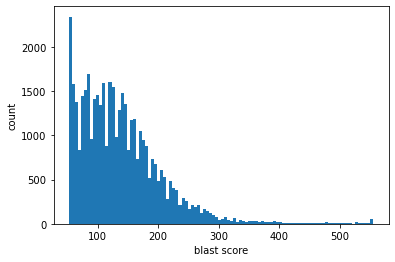

In [45]:
plt.hist(df['score'],bins=100)
plt.xlabel("blast score")
plt.ylabel("count")
plt.show()

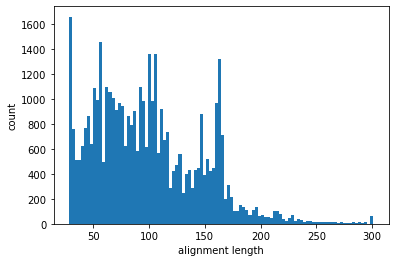

In [46]:
plt.hist(df['aln_len'],bins=100)
plt.xlabel("alignment length")
plt.ylabel("count")
plt.show()

# How many seqs have an exact match?
(after self-matches are removed?)

In [25]:
exact_df = df[df['score']==555.0]
exact_df.shape

(52, 18)

In [26]:
exact_df['q_locus_tag'].value_counts()

EQU24_RS21575    3
EQU24_RS03550    3
EQU24_RS12810    3
EQU24_RS21620    3
EQU24_RS21590    3
EQU24_RS09300    3
EQU24_RS21605    3
EQU24_RS08860    3
EQU24_RS23155    2
EQU24_RS00640    2
EQU24_RS18840    2
EQU24_RS21585    2
EQU24_RS18835    2
EQU24_RS00645    2
EQU24_RS23145    2
EQU24_RS23135    2
EQU24_RS02750    2
EQU24_RS02755    2
EQU24_RS21615    2
EQU24_RS21600    2
EQU24_RS06880    1
EQU24_RS00625    1
EQU24_RS02735    1
EQU24_RS22300    1
Name: q_locus_tag, dtype: int64

In [47]:
with_exact_matches = exact_df['q_locus_tag'].unique()
print(len(with_exact_matches))
with_exact_matches

24


array(['EQU24_RS00625', 'EQU24_RS00640', 'EQU24_RS00645', 'EQU24_RS02735',
       'EQU24_RS02750', 'EQU24_RS02755', 'EQU24_RS03550', 'EQU24_RS06880',
       'EQU24_RS08860', 'EQU24_RS09300', 'EQU24_RS12810', 'EQU24_RS18835',
       'EQU24_RS18840', 'EQU24_RS21575', 'EQU24_RS21585', 'EQU24_RS21590',
       'EQU24_RS21600', 'EQU24_RS21605', 'EQU24_RS21615', 'EQU24_RS21620',
       'EQU24_RS22300', 'EQU24_RS23135', 'EQU24_RS23145', 'EQU24_RS23155'],
      dtype=object)

In [40]:
# adjacency matrix?
ex_adj = df[df['q_locus_tag'].isin(with_exact_matches)]#[['q_locus_tag','s_locus_tag','score','pident']]
ex_adj

,query_name,subject_name,pident,aln_len,mismatches,gap_opens,query_start,query_end,subject_start,subject_end,evalue,score,q_locus_tag,q_gene,q_product,s_locus_tag,s_gene,s_product
672,EQU24_RS00625||,EQU24_RS02735||,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS00625,,,EQU24_RS02735,,
674,EQU24_RS00625||,EQU24_RS18855||,100.000,234,0,0,67,300,67,300,6.680000e-123,433.0,EQU24_RS00625,,,EQU24_RS18855,,
675,EQU24_RS00640||,EQU24_RS18840||,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS00640,,,EQU24_RS18840,,
676,EQU24_RS00640||,EQU24_RS02750||,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS00640,,,EQU24_RS02750,,
678,EQU24_RS00645||,EQU24_RS18835||,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS00645,,,EQU24_RS18835,,
679,EQU24_RS00645||,EQU24_RS02755||,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS00645,,,EQU24_RS02755,,
4608,EQU24_RS02735||,EQU24_RS00625||,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS02735,,,EQU24_RS00625,,
4609,EQU24_RS02735||,EQU24_RS18855||,100.000,234,0,0,67,300,67,300,6.680000e-123,433.0,EQU24_RS02735,,,EQU24_RS18855,,
4610,EQU24_RS02750||,EQU24_RS18840||,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS02750,,,EQU24_RS18840,,
4612,EQU24_RS02750||,EQU24_RS00640||,100.000,300,0,0,1,300,1,300,1.370000e-159,555.0,EQU24_RS02750,,,EQU24_RS00640,,


In [42]:
alt.Chart(ex_adj).mark_rect().encode(
    x = alt.X('q_locus_tag:O'),
    y = alt.Y('s_locus_tag:O'),
    color = alt.Color('score:Q'),
    tooltip = ['query_name:O','subject_name:O','score:Q','pident:Q','aln_len:Q']
)

alt.Chart(...)

# How many hits are > 200bp?

In [69]:
thresh = 200
df[df['aln_len']>thresh].shape

(1104, 18)

Text(0.5, 1.0, 'score distribution of hits > 200bp')

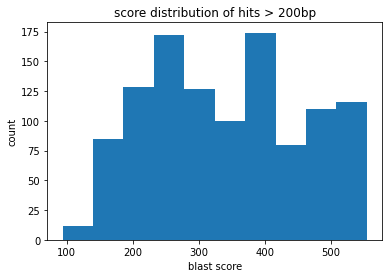

In [70]:
# what are their scores?
plt.hist(df[df['aln_len']>thresh]['score'])
plt.xlabel('blast score')
plt.ylabel('count')
plt.title(f'score distribution of hits > {thresh}bp')

Text(0.5, 1.0, 'pident distribution of hits > 200bp')

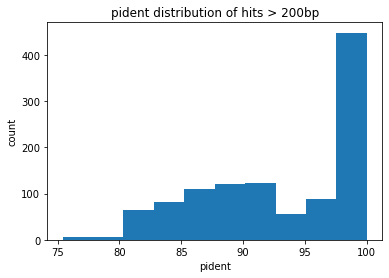

In [71]:
# what are their pidents?
plt.hist(df[df['aln_len']>thresh]['pident'])
plt.xlabel('pident')
plt.ylabel('count')
plt.title(f'pident distribution of hits > {thresh}bp')

In [72]:
# how many unique seqs is that?
len(df[df['aln_len']>thresh]['q_locus_tag'].unique())

463

# How many hits are > 200bp and pident > 90?

In [73]:
high_qual_hit_df = df[(df['aln_len']>thresh) & (df['pident']>90)]
high_qual_hit_df.shape

(722, 18)

Text(0.5, 1.0, 'score distribution of hits > 200bp and pident > 90')

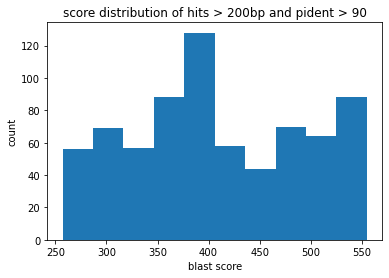

In [75]:
# what are their scores?
plt.hist(high_qual_hit_df[high_qual_hit_df['aln_len']>thresh]['score'])
plt.xlabel('blast score')
plt.ylabel('count')
plt.title(f'score distribution of hits > {thresh}bp and pident > 90')

In [76]:
len(high_qual_hit_df['q_locus_tag'].unique())

425